In [1]:
import os
os.chdir('/Users/akilar/Downloads')

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [3]:
wine_df=pd.read_csv('/Users/akilar/Downloads/winequality-red (1).csv')
x=wine_df.drop('quality',axis=1)
y=wine_df.quality
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

# Logistic regression model

In [4]:
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
y_pred_lr=model_lr.predict(xtest)
print ('Accuracy score for Log Reg model', accuracy_score(ytest,y_pred_lr)*100)

Accuracy score for Log Reg model 62.916666666666664


/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [5]:
cm_lr=confusion_matrix(ytest,y_pred_lr)

In [6]:
cm_lr

array([[  0,   0,   3,   0,   0,   0],
       [  0,   0,   9,   6,   0,   0],
       [  0,   0, 161,  46,   1,   0],
       [  0,   0,  64, 131,   9,   0],
       [  0,   0,   3,  32,  10,   0],
       [  0,   0,   0,   3,   2,   0]])

In [7]:
cr_lr=metrics.classification_report(ytest,y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.77      0.72       208
           6       0.60      0.64      0.62       204
           7       0.45      0.22      0.30        45
           8       0.00      0.00      0.00         5

    accuracy                           0.63       480
   macro avg       0.29      0.27      0.27       480
weighted avg       0.59      0.63      0.60       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# KNN model

In [8]:
neigh=KNeighborsClassifier()
model_knn=neigh.fit(xtrain,ytrain)
y_pred_knn=model_knn.predict(xtest)
print ('Accuracy score for KNN model', accuracy_score(ytest,y_pred_knn)*100)

Accuracy score for KNN model 47.083333333333336


In [9]:
cm_knn=confusion_matrix(ytest,y_pred_knn)
cr_knn=metrics.classification_report(ytest,y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.52      0.61      0.56       208
           6       0.45      0.43      0.44       204
           7       0.29      0.24      0.27        45
           8       0.00      0.00      0.00         5

    accuracy                           0.47       480
   macro avg       0.21      0.21      0.21       480
weighted avg       0.44      0.47      0.46       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
parameter={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(model_knn,parameter,cv=5,scoring='accuracy')
GS.fit(x,y)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [11]:
GS.best_params_

{'n_neighbors': 29, 'weights': 'uniform'}

In [12]:
neigh=KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')
model_knn=neigh.fit(xtrain,ytrain)
y_pred_knn=model_knn.predict(xtest)
print ('Accuracy score for KNN model', accuracy_score(ytest,y_pred_knn)*100)

Accuracy score for KNN model 45.208333333333336


In [13]:
cm_knn=confusion_matrix(ytest,y_pred_knn)

In [14]:
cr_knn=metrics.classification_report(ytest,y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           3       0.17      0.33      0.22         3
           4       0.00      0.00      0.00        15
           5       0.53      0.59      0.56       208
           6       0.47      0.41      0.43       204
           7       0.27      0.22      0.24        45
           8       0.00      0.00      0.00         5

    accuracy                           0.45       480
   macro avg       0.24      0.26      0.24       480
weighted avg       0.45      0.45      0.45       480



# Naive bayes model

In [15]:
nb=GaussianNB()
model_nb=nb.fit(xtrain,ytrain)
y_pred_nb=model_nb.predict(xtest)
print ('Accuracy score for Naive Bayes model', accuracy_score(ytest,y_pred_nb)*100)


Accuracy score for Naive Bayes model 54.79166666666667


In [16]:
cr_knn=metrics.classification_report(ytest,y_pred_nb)
print(cr_knn)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.66      0.68       208
           6       0.58      0.49      0.53       204
           7       0.30      0.58      0.40        45
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.26      0.29      0.27       480
weighted avg       0.58      0.55      0.56       480



# Decision Tree

In [17]:
dt=DecisionTreeClassifier(random_state=5)
model_dt=dt.fit(xtrain,ytrain)
y_pred_dt=model_dt.predict(xtest)
print ('Accuracy score for fully grown DT model', accuracy_score(ytest,y_pred_dt)*100)

Accuracy score for fully grown DT model 58.54166666666667


In [18]:
cr_dt=metrics.classification_report(ytest,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.66      0.67       208
           6       0.64      0.60      0.62       204
           7       0.31      0.49      0.38        45
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.27      0.29      0.28       480
weighted avg       0.59      0.59      0.59       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random forest

In [19]:
rf=RandomForestClassifier(n_estimators=17,criterion='entropy',random_state=0)
model_rf=rf.fit(xtrain,ytrain)
y_pred_rf=model_rf.predict(xtest)
print ('Accuracy score for RF model', accuracy_score(ytest,y_pred_rf)*100)

Accuracy score for RF model 66.25


In [20]:
cr_rf=metrics.classification_report(ytest,y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.70      0.78      0.74       208
           6       0.66      0.63      0.65       204
           7       0.53      0.60      0.56        45
           8       0.00      0.00      0.00         5

    accuracy                           0.66       480
   macro avg       0.31      0.34      0.32       480
weighted avg       0.63      0.66      0.65       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagged models

In [21]:
from sklearn.ensemble import BaggingClassifier

# Bagged KNN

In [22]:
bgcl_knn=BaggingClassifier(base_estimator=model_knn,n_estimators=10,random_state=0)
model_bagged_knn=bgcl_knn.fit(xtrain,ytrain)
y_pred_knn_bagged=model_bagged_knn.predict(xtest)
print ('Accuracy score for KNN model', accuracy_score(ytest,y_pred_knn_bagged)*100)
cr_knn_bagged=metrics.classification_report(ytest,y_pred_knn_bagged)
print(cr_knn_bagged)

Accuracy score for KNN model 48.95833333333333
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00        15
           5       0.54      0.57      0.56       208
           6       0.48      0.47      0.48       204
           7       0.38      0.42      0.40        45
           8       0.00      0.00      0.00         5

    accuracy                           0.49       480
   macro avg       0.32      0.30      0.31       480
weighted avg       0.48      0.49      0.48       480



# Bagged Naive bayes

In [23]:
bgcl_nb=BaggingClassifier(base_estimator=model_nb,n_estimators=10,random_state=0)
model_bagged_nb=bgcl_nb.fit(xtrain,ytrain)
y_pred_nb_bagged=model_bagged_nb.predict(xtest)
print ('Accuracy score for Naive Bayes model', accuracy_score(ytest,y_pred_nb_bagged)*100)
cr_nb_bagged=metrics.classification_report(ytest,y_pred_nb_bagged)
print(cr_knn_bagged)

Accuracy score for Naive Bayes model 51.45833333333333
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00        15
           5       0.54      0.57      0.56       208
           6       0.48      0.47      0.48       204
           7       0.38      0.42      0.40        45
           8       0.00      0.00      0.00         5

    accuracy                           0.49       480
   macro avg       0.32      0.30      0.31       480
weighted avg       0.48      0.49      0.48       480



# Bagged Linear regression

In [24]:
bgcl_lr=BaggingClassifier(base_estimator=model_lr,n_estimators=10,random_state=0)
model_bagged_lr=bgcl_lr.fit(xtrain,ytrain)
y_pred_lr_bagged=model_bagged_lr.predict(xtest)
print ('Accuracy score for Log Reg model', accuracy_score(ytest,y_pred_lr_bagged)*100)
cr_lr_bagged=metrics.classification_report(ytest,y_pred_lr_bagged)
print(cr_knn)

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-package

Accuracy score for Log Reg model 63.74999999999999
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.66      0.68       208
           6       0.58      0.49      0.53       204
           7       0.30      0.58      0.40        45
           8       0.00      0.00      0.00         5

    accuracy                           0.55       480
   macro avg       0.26      0.29      0.27       480
weighted avg       0.58      0.55      0.56       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bagged DT

In [25]:
bgcl_dt=BaggingClassifier(base_estimator=model_dt,n_estimators=10,random_state=0)
model_bagged_dt=bgcl_dt.fit(xtrain,ytrain)
y_pred_dt_bagged=model_dt.predict(xtest)
print ('Accuracy score for fully grown DT model', accuracy_score(ytest,y_pred_dt_bagged)*100)
cr_dt_bagged=metrics.classification_report(ytest,y_pred_dt_bagged)
print(cr_dt_bagged)

Accuracy score for fully grown DT model 58.54166666666667
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.66      0.67       208
           6       0.64      0.60      0.62       204
           7       0.31      0.49      0.38        45
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.27      0.29      0.28       480
weighted avg       0.59      0.59      0.59       480



/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Adaboost classifier

In [26]:
boost_nb=AdaBoostClassifier(base_estimator=model_nb,n_estimators=100,random_state=2)

# Gradient boosting

In [27]:
gboost=GradientBoostingClassifier(n_estimators=100,random_state=0)

# model comparison

In [28]:
models=[]
models.append(('Base_lr',model_lr))
models.append(('Bagged_lr',bgcl_lr))
models.append(('Base_knn',model_knn))
models.append(('Bagged_knn',bgcl_knn))
models.append(('Base_nb',model_nb))
models.append(('Bagged_nb',bgcl_nb))
models.append(('Boost_nb',boost_nb))
models.append(('Base_dt',model_dt))
models.append(('Bagged_dt',bgcl_dt))
models.append(('RF',model_rf))
models.append(('Grad boost',gboost))

models

[('Base_lr',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('Bagged_lr',
  BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None, max_iter=100,
                                                      multi_class='warn',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=None,
                             

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-package

Base_lr: 0.569134 (0.001550)


/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-package

Bagged_lr: 0.567259 (0.001405)
Base_knn: 0.427778 (0.004898)
Bagged_knn: 0.451524 (0.001702)
Base_nb: 0.527249 (0.001618)
Bagged_nb: 0.532245 (0.001612)
Boost_nb: 0.486569 (0.000760)
Base_dt: 0.455317 (0.001059)
Bagged_dt: 0.541603 (0.000228)
RF: 0.560370 (0.000595)
Grad boost: 0.550984 (0.000326)


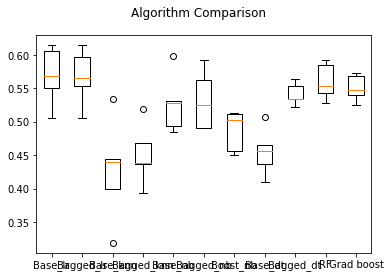

In [29]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import model_selection
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold,scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for name, model in models:
    k=0
    recall=np.zeros((3,3))
    prec=np.zeros((3,3))
    fscore=np.zeros((3,3))
    for train,test in kf.split(x,y):
        xtrain,xtest=x.iloc[train,:],x.iloc[test,:]
        ytrain,ytest=y[train],y[test]
        model.fit(xtrain,ytrain)
        y_predict=model.predict(xtest)
        cm=metrics.confusion_matrix(ytest,y_predict)
        for i in np.arange(0,3):
            recall[i,k]=cm[i,i]/cm[i,:].sum()
        for i in np.arange(0,3):
            prec[i,k]=cm[i,i]/cm[:,i].sum()
        k=k+1
        for row in np.arange(0,3):
            for column in np.arange(0,3):
                fscore[row,column]=2*recall[row,column]*prec[row,column]/(recall[row,column]+prec[row,column])
    print('f1-weighted for class 1 : %0.2f (+/- %0.5f) [%s]'%(np.mean(fscore[1,:]),np.var(fscore[0,:],ddof=1),name))
    print('f1-weighted for class 2 : %0.2f (+/- %0.5f) [%s]'%(np.mean(fscore[1,:]),np.var(fscore[1,:],ddof=1),name))
    print('f1-weighted for class 3 : %0.2f (+/- %0.5f) [%s]'%(np.mean(fscore[2,:]),np.var(fscore[2,:],ddof=1),name))

/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

f1-weighted for class 1 : nan (+/- nan) [Base_lr]
f1-weighted for class 2 : nan (+/- nan) [Base_lr]
f1-weighted for class 3 : 0.69 (+/- 0.00138) [Base_lr]


/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/akilar/opt/anaconda3/lib/python3.7/site-package

f1-weighted for class 1 : nan (+/- nan) [Bagged_lr]
f1-weighted for class 2 : nan (+/- nan) [Bagged_lr]
f1-weighted for class 3 : 0.69 (+/- 0.00134) [Bagged_lr]
f1-weighted for class 1 : nan (+/- nan) [Base_knn]
f1-weighted for class 2 : nan (+/- nan) [Base_knn]
f1-weighted for class 3 : 0.59 (+/- 0.00044) [Base_knn]


/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/Users/akilar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountere

f1-weighted for class 1 : nan (+/- nan) [Bagged_knn]
f1-weighted for class 2 : nan (+/- nan) [Bagged_knn]
f1-weighted for class 3 : 0.62 (+/- 0.00123) [Bagged_knn]
f1-weighted for class 1 : 0.10 (+/- nan) [Base_nb]
f1-weighted for class 2 : 0.10 (+/- 0.00558) [Base_nb]
f1-weighted for class 3 : 0.66 (+/- 0.00113) [Base_nb]


ZeroDivisionError: Weights sum to zero, can't be normalized